# Automobile Dataset

Этот набор данных состоит из данных из автомобильного ежегодника Уорда за 1985 год.

Описание содержимого датасета:

normalized-losses: Страховой риск

make: Марка авто

fuel-type: Тип топлива

aspiration: Тип двигателя 

num-of-doors: Кол-во дверей

body-style: Тип кузова

drive-wheels: Тип привода

engine-location: Расположение двигателя

### Подключенки необходимых библиотек

In [233]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy
import pandas as pd
from pandas import DataFrame
from matplotlib.ticker import MultipleLocator, FixedLocator
from IPython.display import display, HTML

Считывание данных, демонстрация первых 5-ти записей

In [234]:
path = "/home/dima/Myproject/DSIS_summer/archive"
data = pd.read_csv('/home/dima/Myproject/DSIS_summer/archive/Automobile_data.csv')
filenames = glob.glob(path + "/*.csv")
dfs = []
for _ in filenames:
    dfs.append(pd.read_csv(_))
data = pd.concat(dfs, ignore_index=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Диаграмма, демонстрирующая процентное соотношение автомобильных компаний

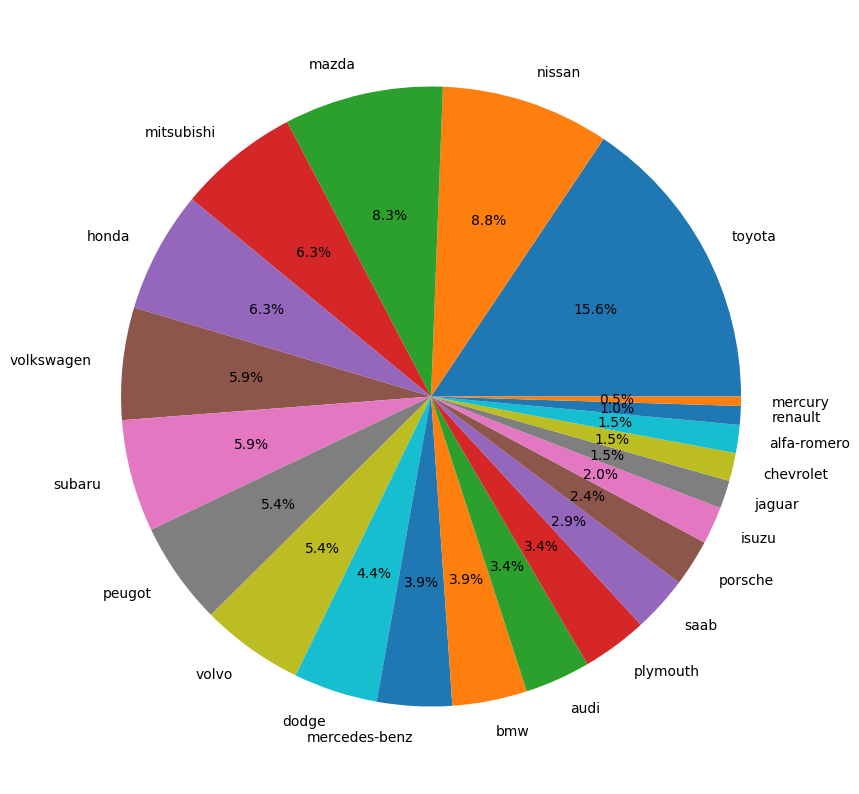

In [235]:
fig, ax = plt.subplots(figsize=(10,12))
df1 = pd.DataFrame(data['make'].value_counts().reset_index())
plt.pie(data=df1,x=df1['count'],labels=df1['make'], autopct='%.1f%%')
plt.show()


По данной диаграмме можно сказать, что большую чать рынка на 1985 год занимают автопроизводители Японии (Toyota: 15,6%, Nissan: 8,8%, Mazda: 8,3% и т.д.)

### Диаграмма демонстрирующая количественную разницу между машинами на газу и дизеле 

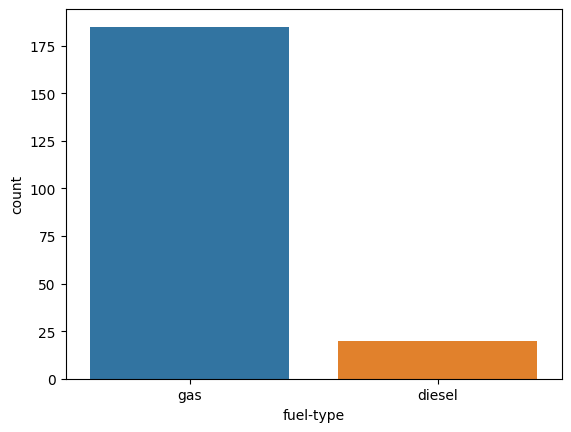

In [236]:
graph1 = sns.countplot(x='fuel-type', data=data)

По данной диагармме можно сказать, что большая часть автомобилей на 1985 год, создавались с газовыми двигателями

### Диаграмма демонстрирующая количественную разницу между разными видами кусова автомобилей

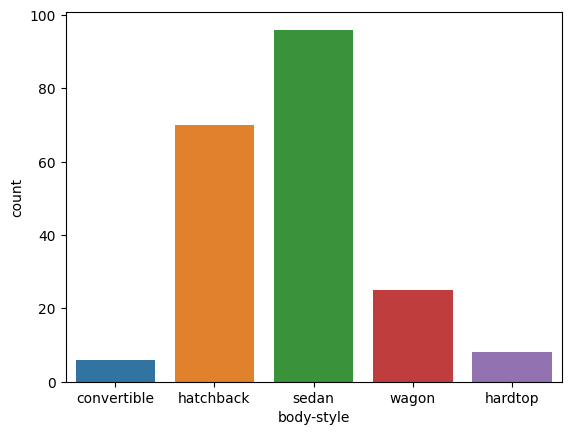

In [237]:
graph1 = sns.countplot(x='body-style', data=data)

### Диаграмма демонструрующая зависимость объема двигателя к лошадиным силам

Text(0, 0.5, 'Объем двигателя (см³)')

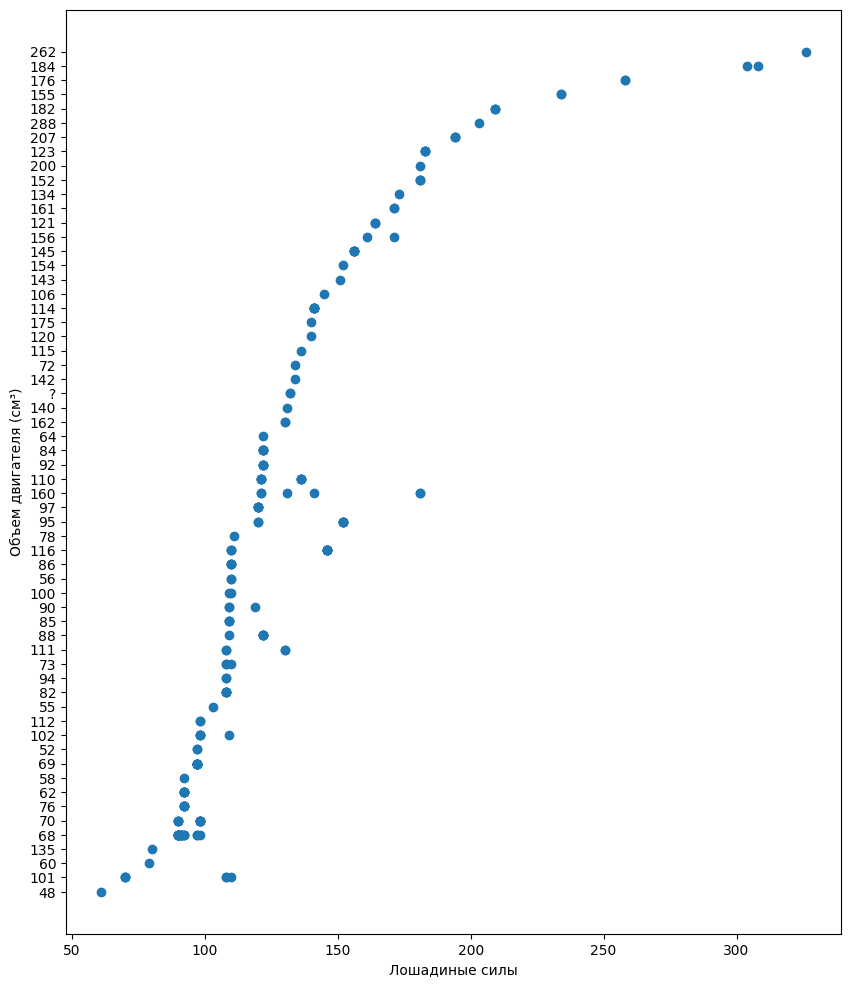

In [238]:
fig, ax = plt.subplots(figsize=(10,12))
#df = data.sort_values('engine-size')

plt.scatter(df['engine-size'], df['horsepower'])
ax.set_xlabel("Лошадиные силы")
ax.set_ylabel("Объем двигателя (см³)")


По данной диагармме можно сказать, что мощность автомобиля растет не пропорционально объему двигателя

### Стоимость автомобилей

In [239]:
dict = {'Марка':[],
        'Стоимость':[]
       }
  
df = pd.DataFrame(dict)
for i in range(len(data)):
    make = data['make'].loc[data.index[i]]
    price = data['price'].loc[data.index[i]]
    if price != '?':
        df2 = {'Марка': make, 'Стоимость': int(price)}
        df = pd.concat([df, pd.DataFrame([df2])], ignore_index=True)
display(df)

,Марка,Стоимость
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
196,volvo,16845.0
197,volvo,19045.0
198,volvo,21485.0
199,volvo,22470.0


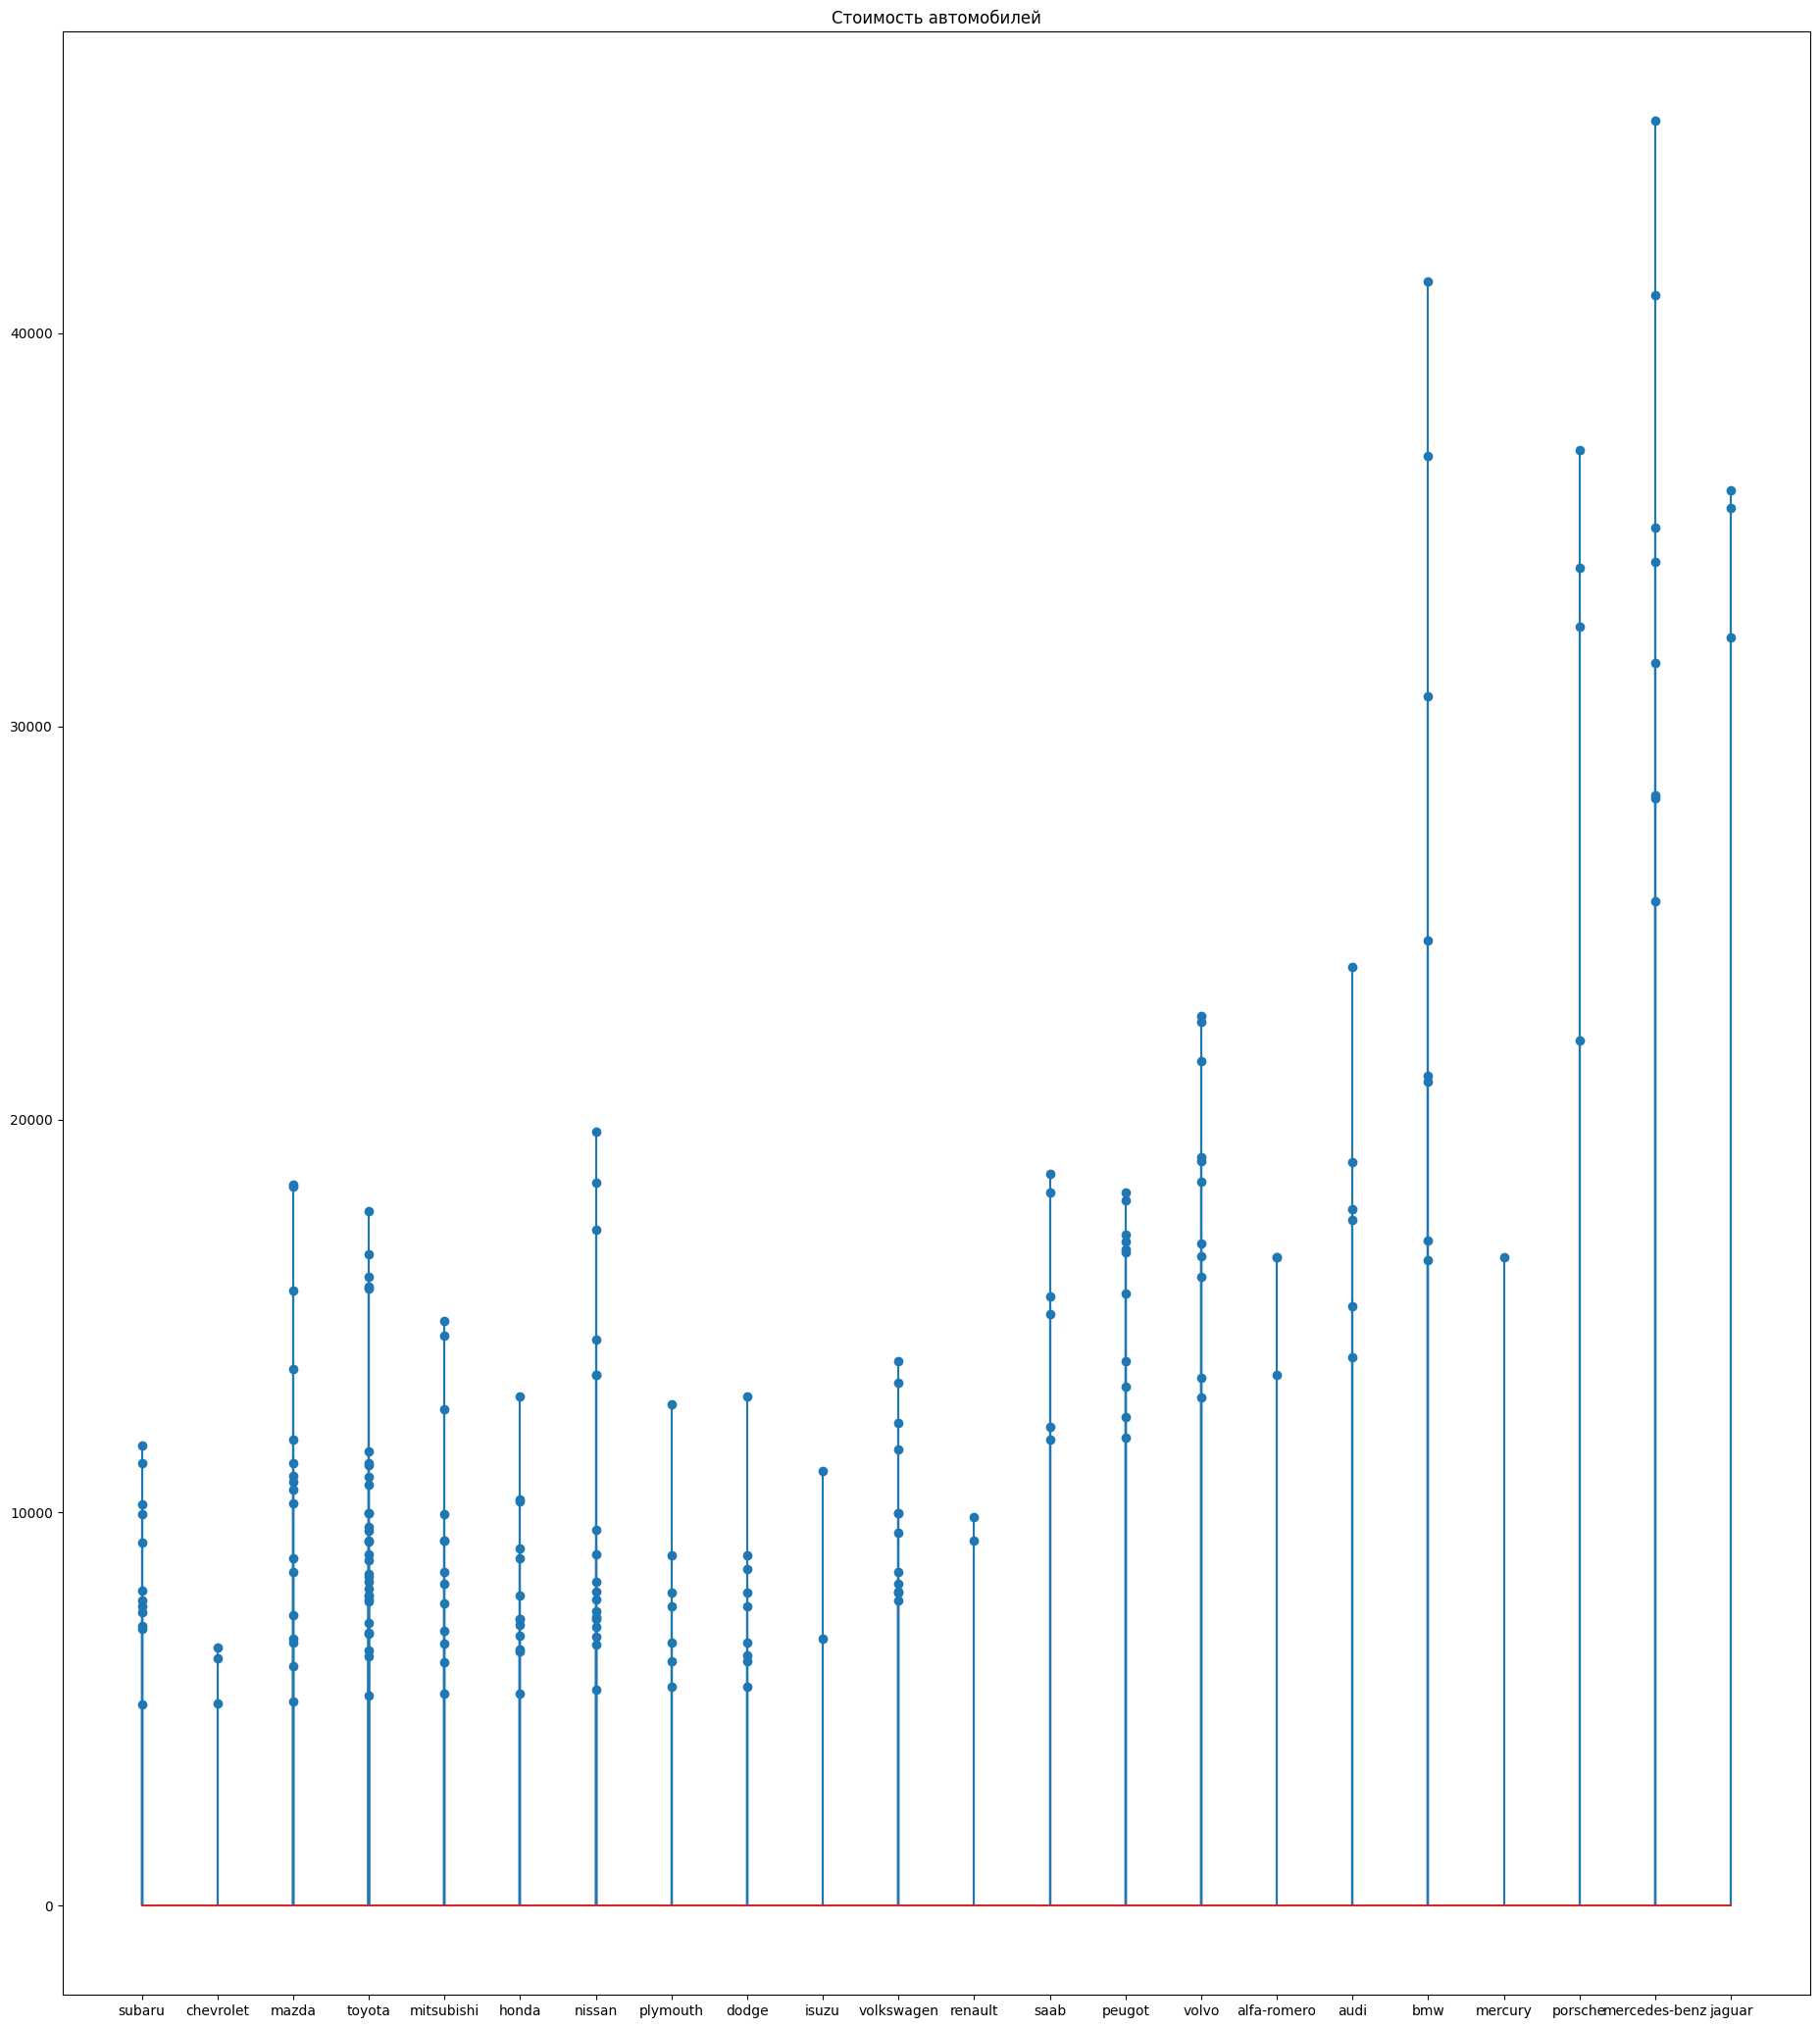

In [240]:
fig = plt.figure(figsize=(23, 26))
df = df.sort_values(by='Стоимость', ascending = True, ignore_index=True)
ax = fig.add_subplot()
plt.title('Стоимость автомобилей')
line2 = ax.stem(df['Марка'], df['Стоимость'])
df = df.sort_values('Стоимость', ascending = False)


In [241]:
df.tail(5) #самые дешевые машины

,Марка,Стоимость
4,mitsubishi,5389.0
3,toyota,5348.0
2,mazda,5195.0
1,chevrolet,5151.0
0,subaru,5118.0


In [242]:
df.head(5) #самые дорогие машины

,Марка,Стоимость
200,mercedes-benz,45400.0
199,bmw,41315.0
198,mercedes-benz,40960.0
197,porsche,37028.0
196,bmw,36880.0


По данной диаграмме и двум таблицам можно сказать, что самые дорогие автомобили, это автомобили марок BMW, Porsche и Mercedes-benz, т.к даже в 80-е немецкие автомобили считались премиальными и стоили соответственно. Самые дешевые автомобили, это автомобили марок Mitsubishi, Toyota, Mazda, Chevrolet и Subaru, т.к японцы всегда производили массовые и не дорогие автомобили, а Chevrolet - это марка внутреннего рынка Америке.

### Расход топлива

In [243]:
dict = {'Марка':[],
        'Расход по трассе':[],
        'Расход по городу':[],
        'Средний расход':[]
       }
  
df = pd.DataFrame(dict)
for i in range(len(data)):
    make = data['make'].loc[data.index[i]] 
    city_mpg = data['city-mpg'].loc[data.index[i]]
    highway_mpg = data['highway-mpg'].loc[data.index[i]]
    sr_mpg = (data['highway-mpg'].loc[data.index[i]] + data['city-mpg'].loc[data.index[i]]) / 2
    df2 = {'Марка': make, 'Расход по трассе': highway_mpg, 'Расход по городу': city_mpg, 'Средний расход': sr_mpg}
    df = pd.concat([df, pd.DataFrame([df2])], ignore_index=True)
display(df)

,Марка,Расход по трассе,Расход по городу,Средний расход
0,alfa-romero,27.0,21.0,24.0
1,alfa-romero,27.0,21.0,24.0
2,alfa-romero,26.0,19.0,22.5
3,audi,30.0,24.0,27.0
4,audi,22.0,18.0,20.0
...,...,...,...,...
200,volvo,28.0,23.0,25.5
201,volvo,25.0,19.0,22.0
202,volvo,23.0,18.0,20.5
203,volvo,27.0,26.0,26.5


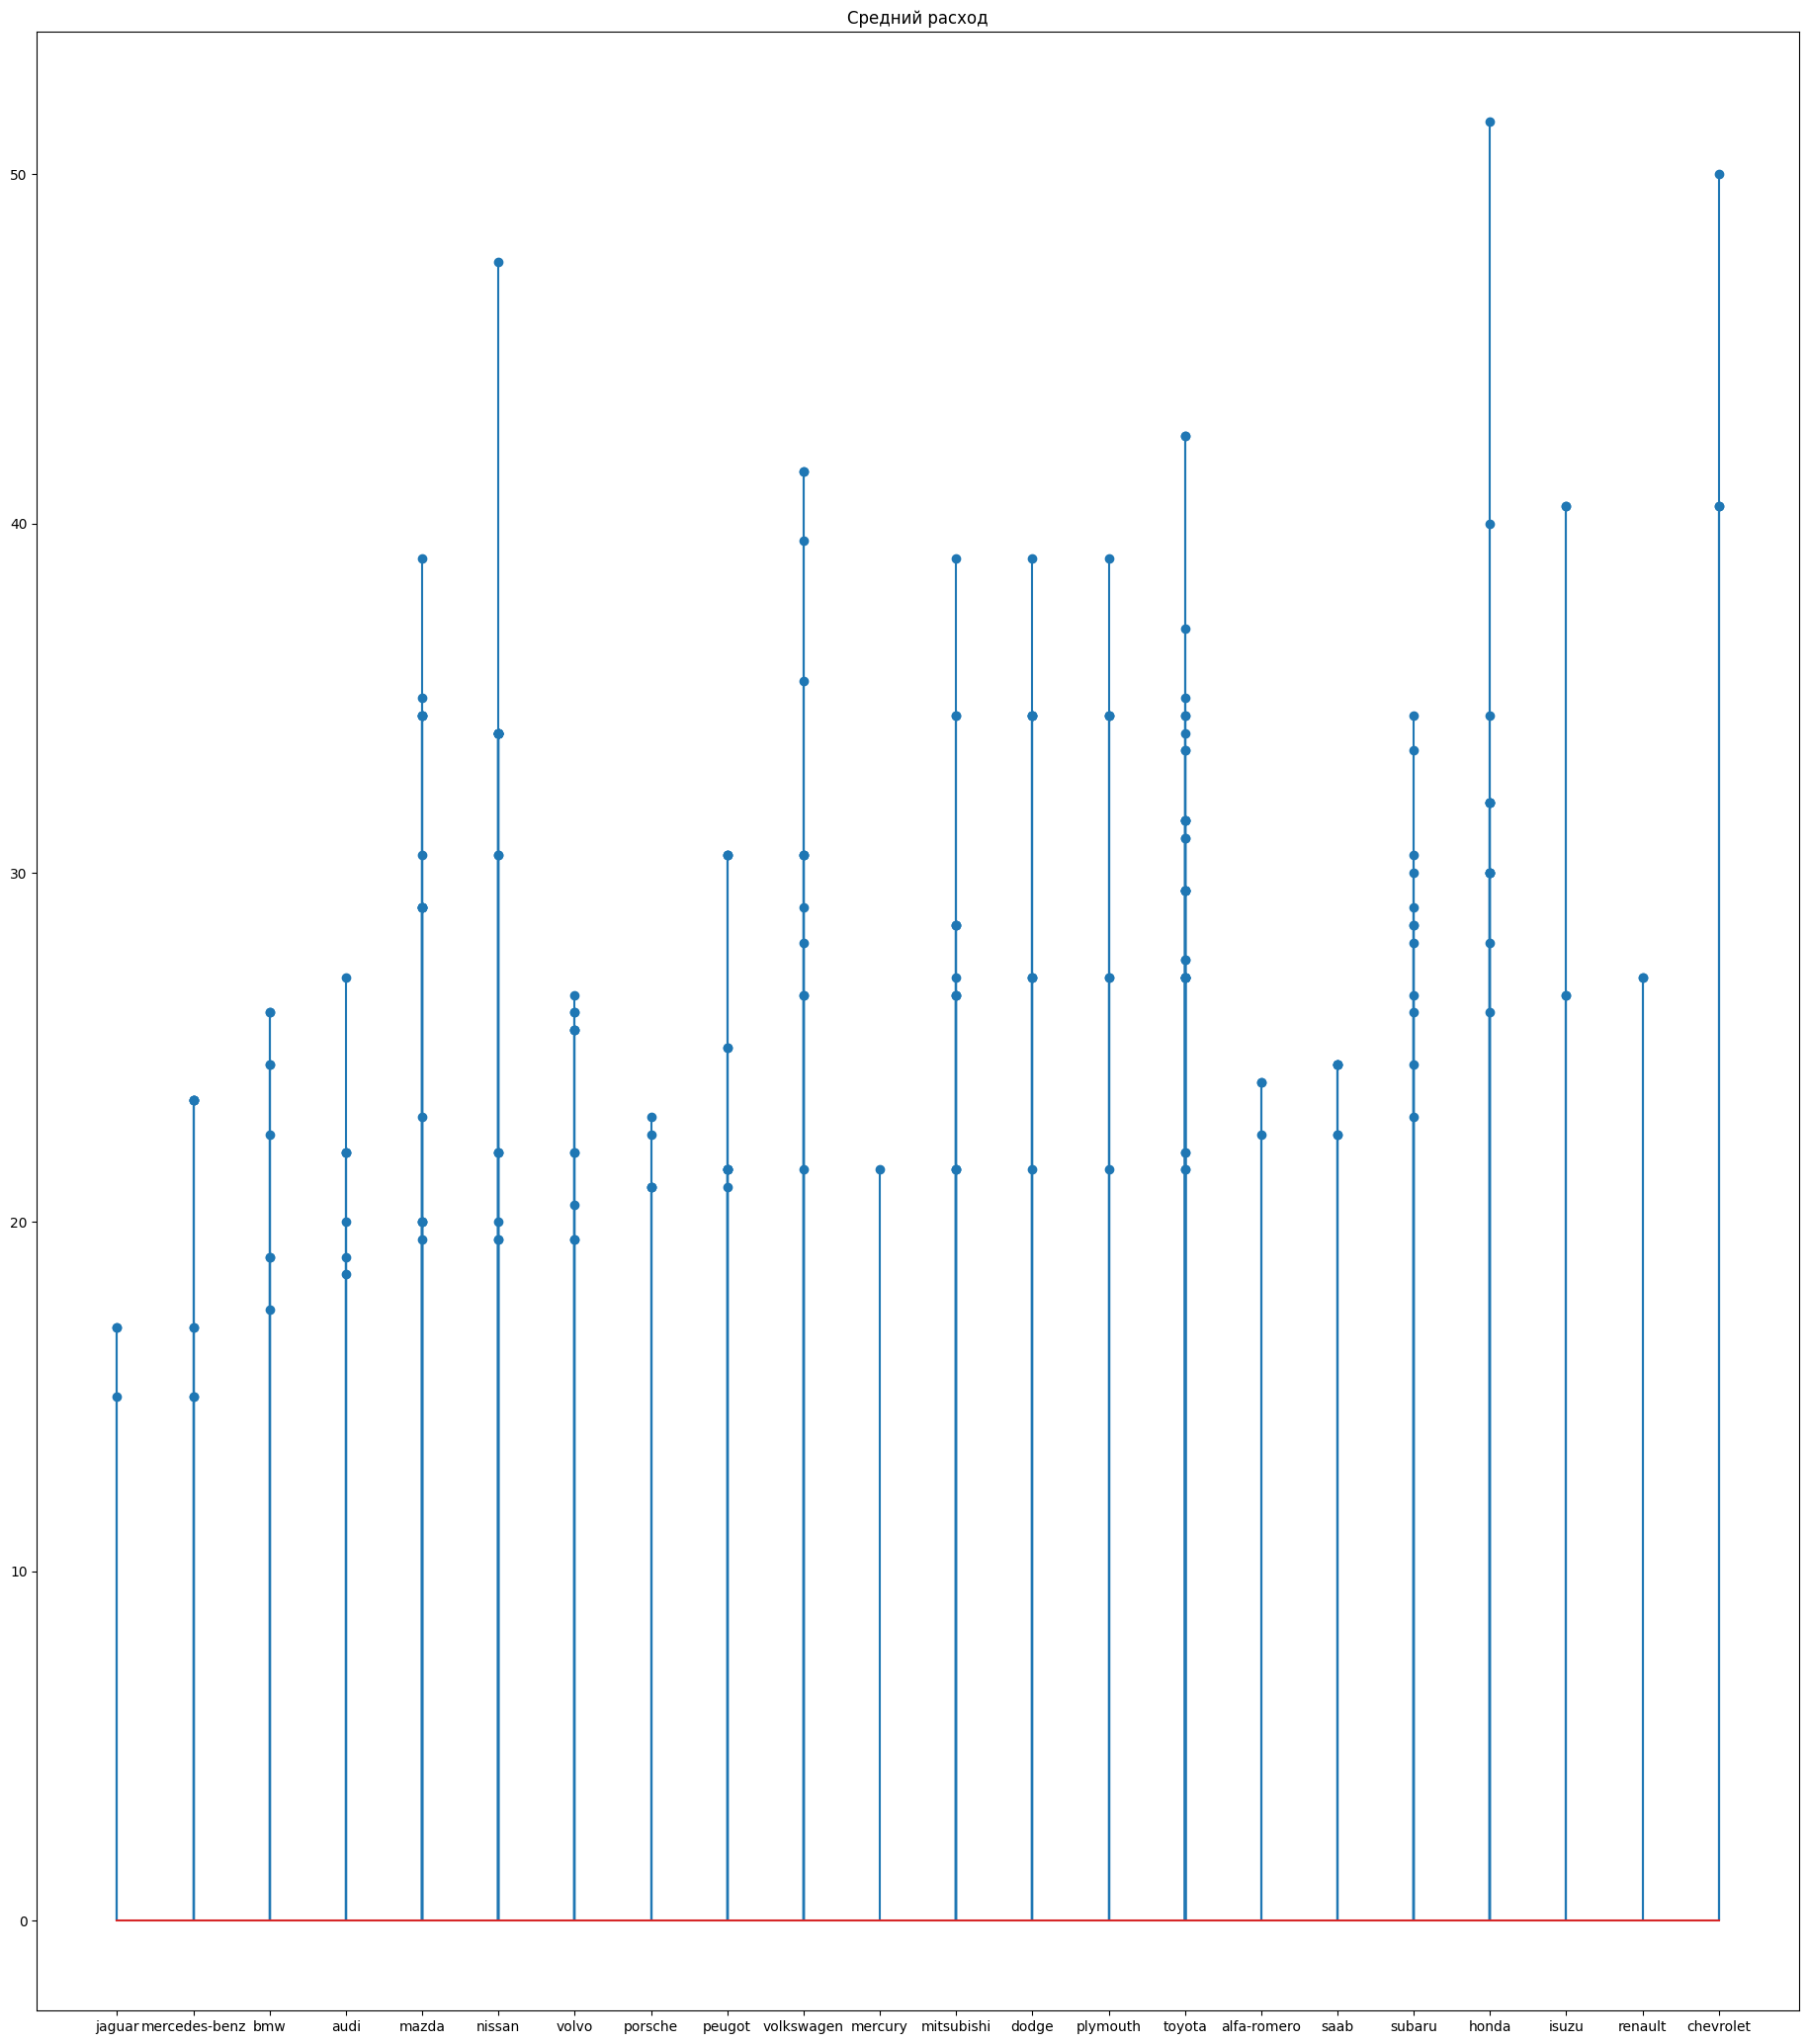

In [244]:
fig = plt.figure(figsize=(23, 26))
df = df.sort_values(by='Средний расход', ascending = True, ignore_index=True)
ax = fig.add_subplot()
plt.title('Средний расход')
line2 = ax.stem(df['Марка'], df['Средний расход'])

In [245]:
df.tail(1) # автомобиль с максимальным расходом

,Марка,Расход по трассе,Расход по городу,Средний расход
204,honda,54.0,49.0,51.5


Самый большой расход топлива наблюдается у автомобиля марки Honda. Это связанно с тем, что в те года на автомобили это марки ставили 4-ех цилинтровые, рыдные движки, которые имели болезнь тратить большое к

In [246]:
df.head(1) # автомобиль с минимальных

,Марка,Расход по трассе,Расход по городу,Средний расход
0,jaguar,17.0,13.0,15.0
